In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime

In [2]:
start=datetime.datetime(2018,1,1)
end=datetime.datetime(2021,1,1)
msft=web.DataReader("MSFT","yahoo",start,end)
goog=web.DataReader("GOOGL","yahoo",start,end)
amzn=web.DataReader("AMZN","yahoo",start,end)

In [3]:
msft.name="Microsoft"
goog.name="Google"
amzn.name="Amazon"

In [4]:
#FUNCTIONS
#Concat Functions
def funct(j):
    comp=pd.concat([msft[j],goog[j],amzn[j]],axis=1)
    comp.columns=["Microsoft","Google","Amazon"]
    return comp

def diff(u,l):
    comp=pd.concat([msft[u]-msft[l],goog[u]-goog[l],amzn[u]-amzn[l]],axis=1)
    comp.columns=["Microsoft","Google","Amazon"]
    return comp

#Display Function
def display(comp,title):
    comp.plot(figsize=(15,10))
    plt.title(title,fontsize=12)
    
#KDE display
def displaykde(comp,title):
    comp.plot.kde(figsize=(15,10))
    plt.title(title,fontsize=12)

#Scatter matrix
def scatter_matrix(comp):
    from pandas.plotting import scatter_matrix as sm
    sm(comp,figsize=(15,10),alpha=0.5,hist_kwds={"bins":50})
    plt.show()

#Resample
def resample(time,column):
    comp=pd.concat([msft[column].resample(time).mean(),goog[column].resample(time).mean(),amzn[column].resample(time).mean()],axis=1)
    comp.columns=["Microsoft","Google","Amazon"]
    return comp

#Moving Average
def MA(cname,number_of_days,column):
    for i in [msft,goog,amzn]:
        i[cname]=i[column].rolling(number_of_days).mean()

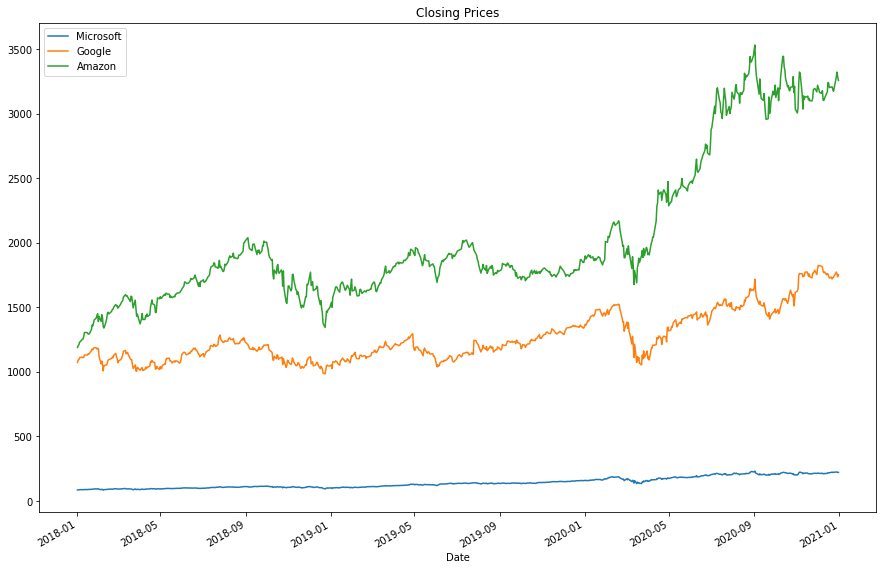

In [5]:
#Closing Prices
close_comp=funct("Close")
display(close_comp,"Closing Prices")

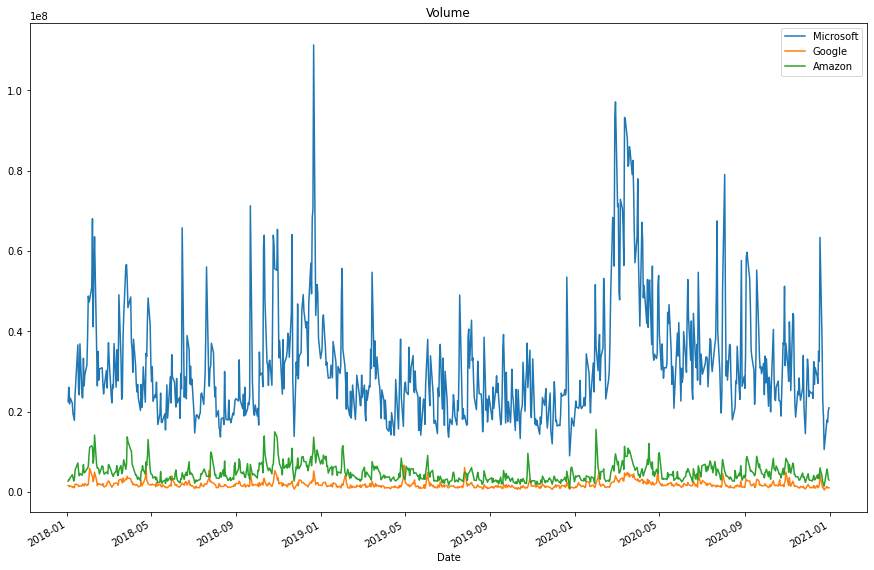

In [6]:
#Volume
vol_comp=funct("Volume")
display(vol_comp,"Volume")

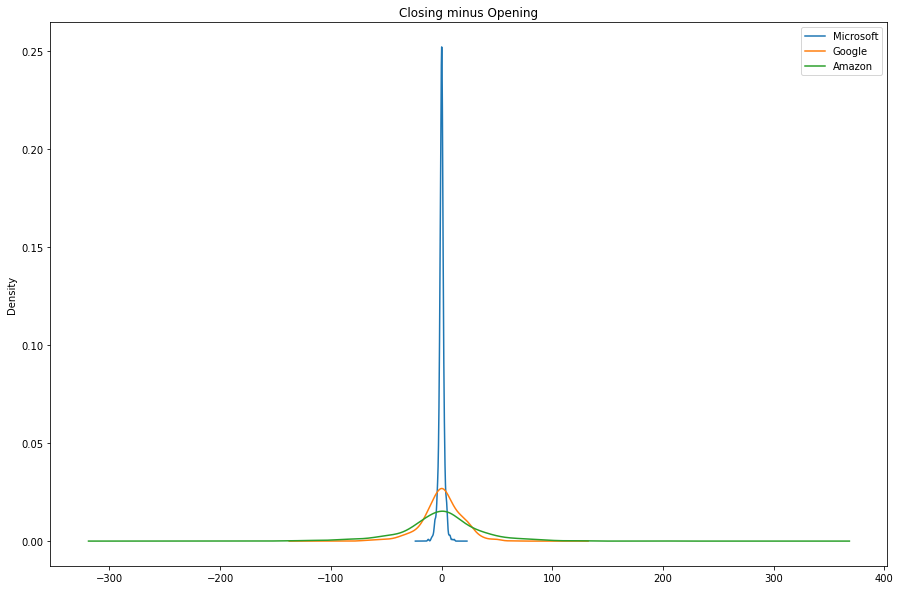

In [7]:
#Price changes in a day(Close and Open)
price_change_comp=diff("Close","Open")
displaykde(price_change_comp,"Closing minus Opening")

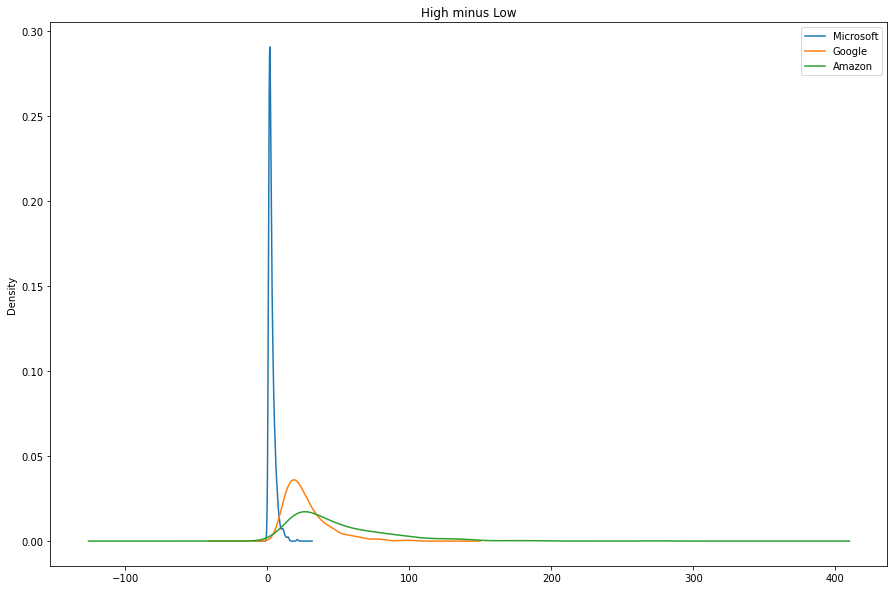

In [8]:
#Price changes in a day-High and Low
price_change_comp1=diff("High","Low")
displaykde(price_change_comp1,"High minus Low")

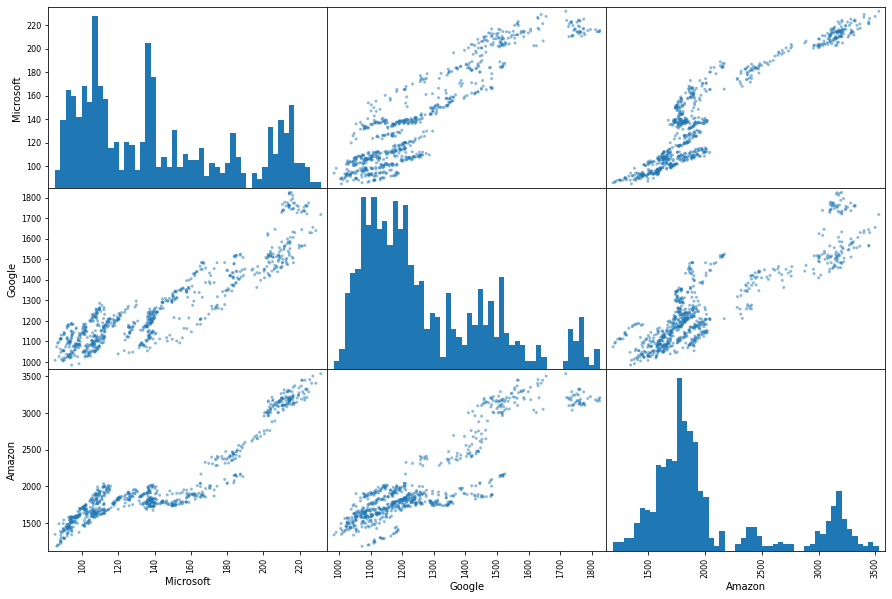

In [9]:
scatter_matrix(close_comp)

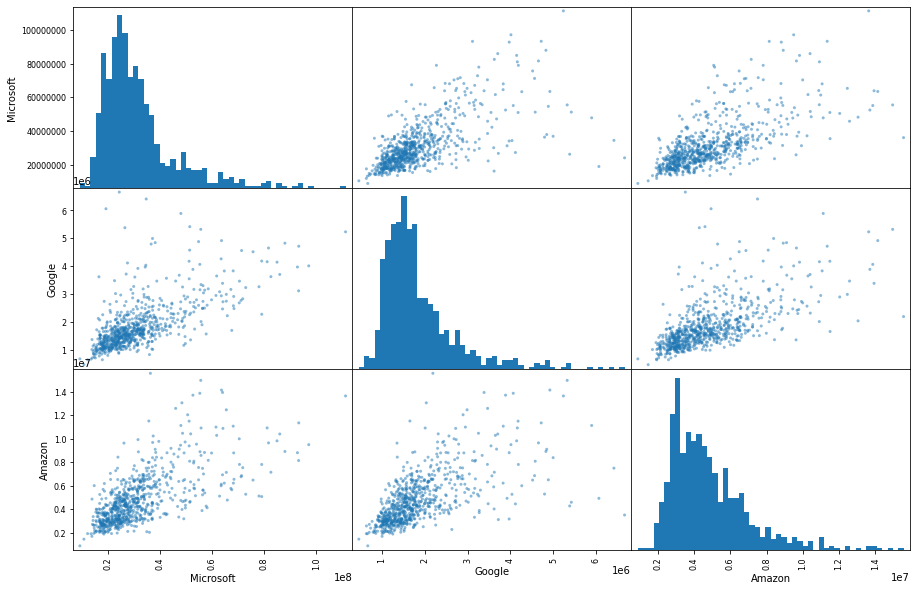

In [10]:
scatter_matrix(vol_comp)

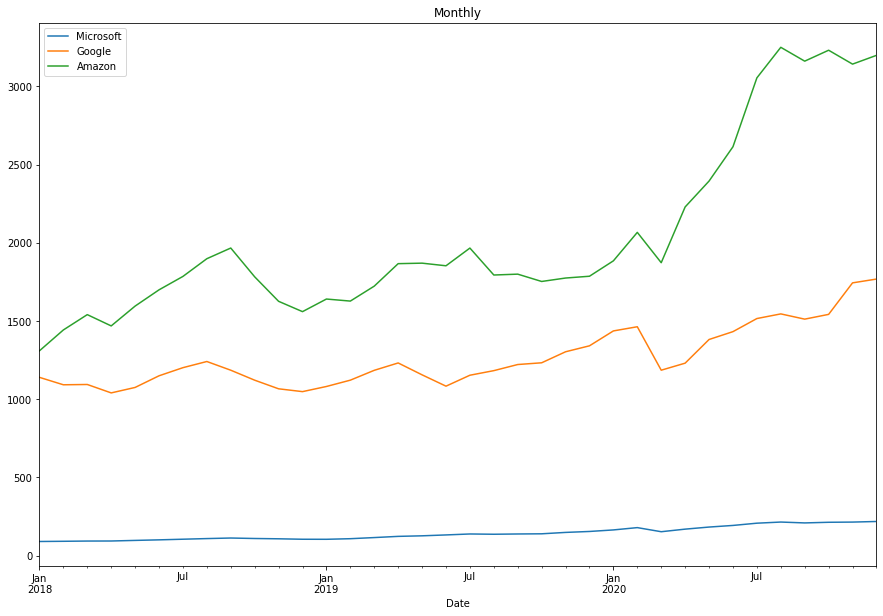

In [11]:
vol_comp=resample("M","Close")
display(vol_comp,"Monthly")

In [12]:
#CandleStick
def cadlestick(i):
    import plotly.graph_objects as go
    figure=go.Figure(data=[
        go.Candlestick(
        x=i.index,
        close=i.Close,
        open=i.Open,
        high=i.High,
        low=i.Low,
        increasing_line_color="blue",
        decreasing_line_color="red")])
    figure.show()

for i in [msft,goog,amzn]:
    print(i.name)
    cadlestick(i)
    

Microsoft


Google


Amazon


In [13]:
for i in [msft,goog,amzn]:
    i["Daily_Returns"]=i.Close.pct_change(1)

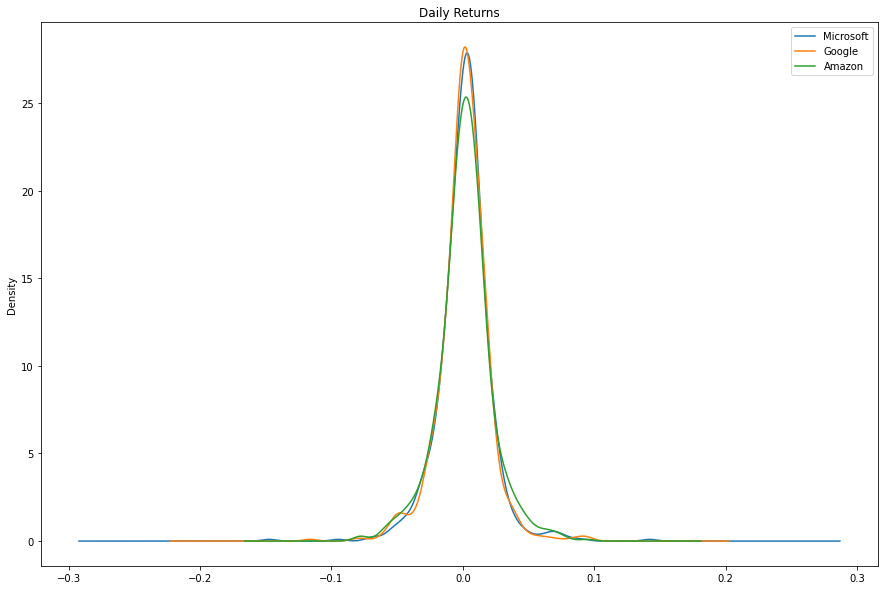

In [14]:
return_comp=funct("Daily_Returns")
displaykde(return_comp,"Daily Returns")

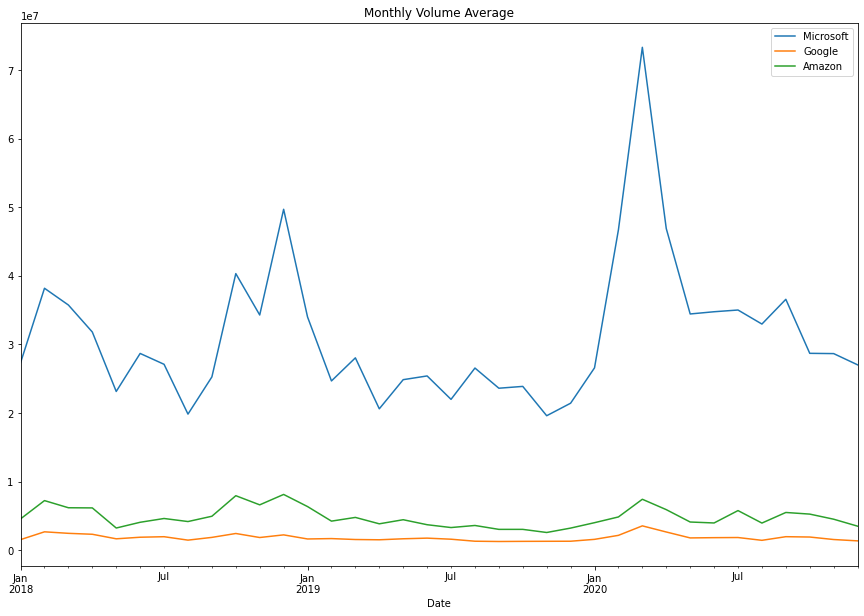

In [15]:
vol_comp=resample("M","Volume")
display(vol_comp,"Monthly Volume Average")

In [16]:
for i in [msft,goog,amzn]:
    i["Cumulative Returns"]=(1+i["Daily_Returns"]).cumprod()

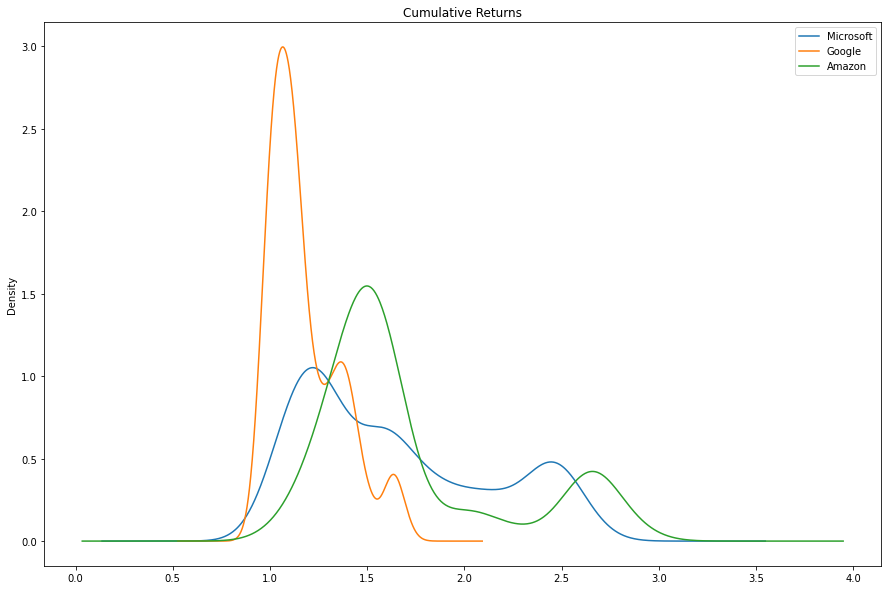

In [17]:
cr_comp=funct("Cumulative Returns")
displaykde(cr_comp,"Cumulative Returns")

In [18]:
MA("50 Days MA",50,"Close")
MA("200 Days MA",200,"Close")

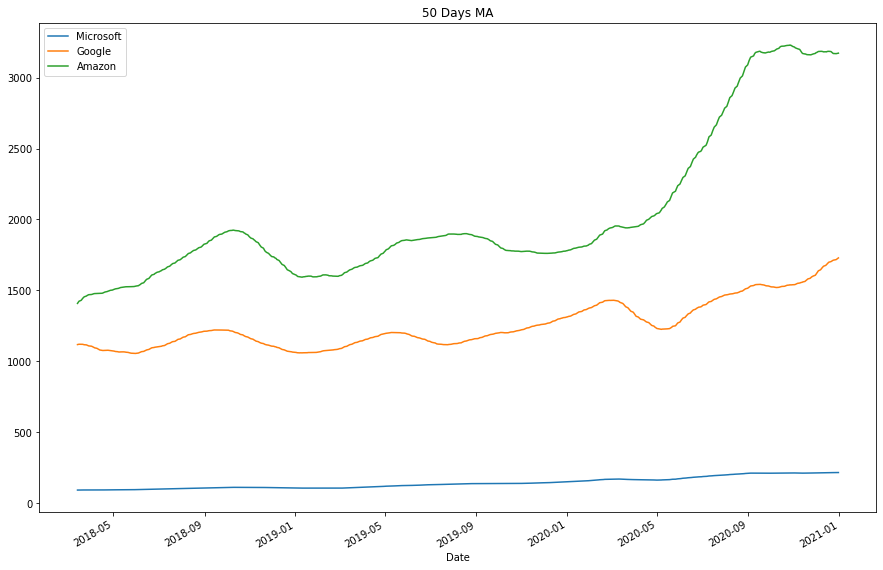

In [19]:
MA50_comp=funct("50 Days MA")
display(MA50_comp,"50 Days MA")

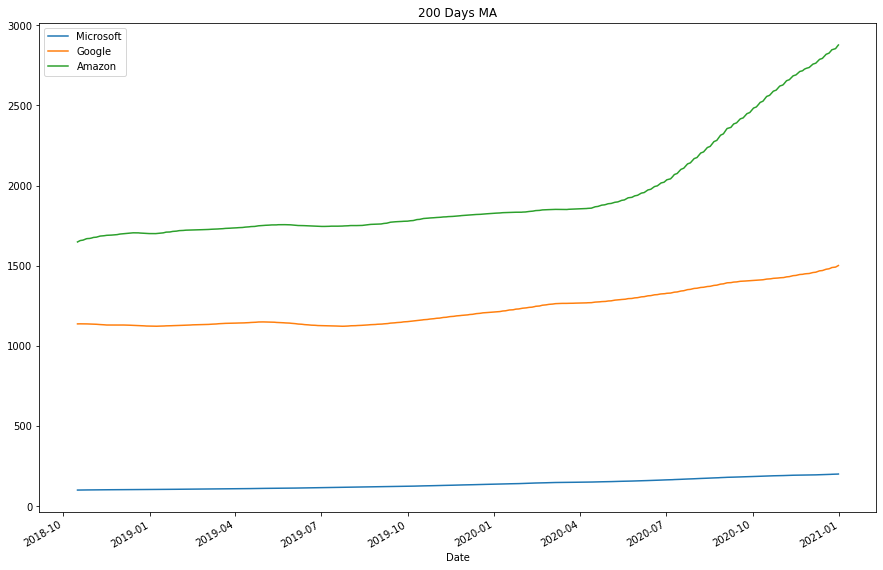

In [20]:
MA200_comp=funct("200 Days MA")
display(MA200_comp,"200 Days MA")

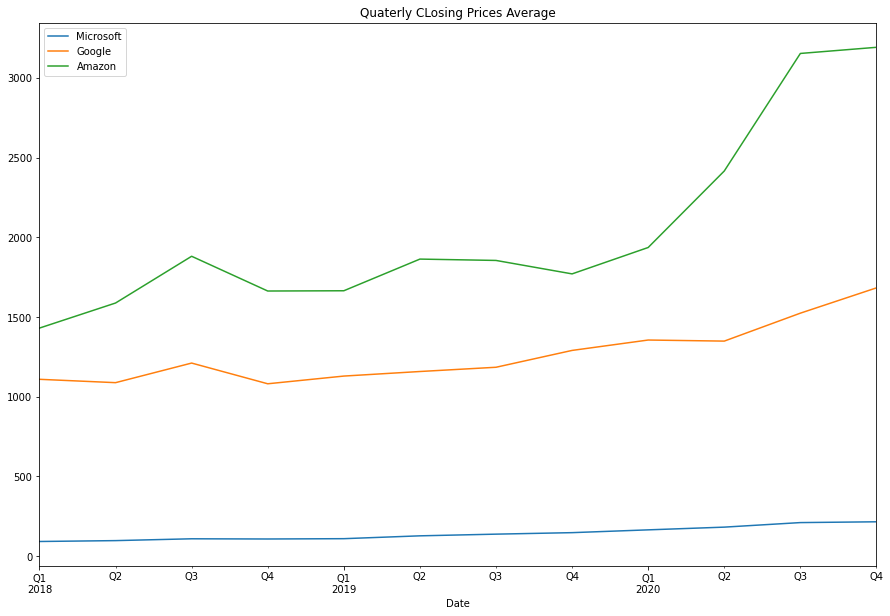

In [21]:
Q_comp=resample("Q","Close")
display(Q_comp,"Quaterly CLosing Prices Average")